In [1]:
# step 1
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
import matplotlib.pylab as plt

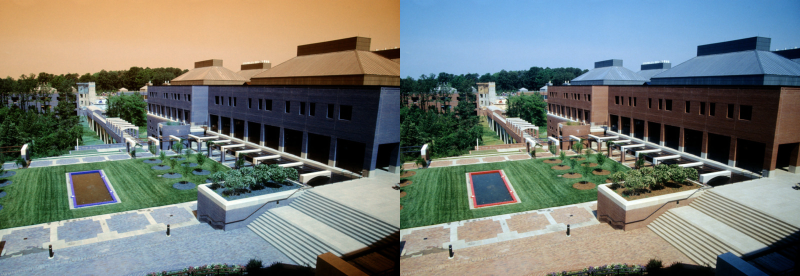

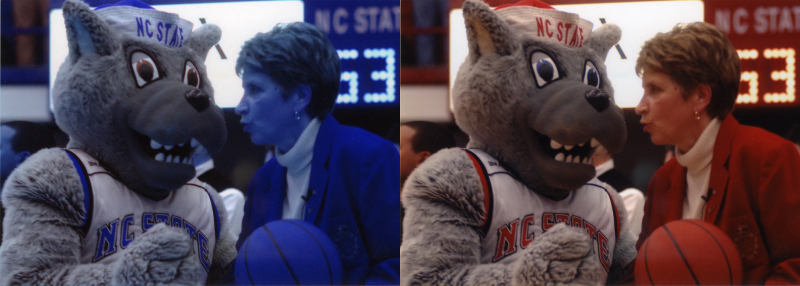

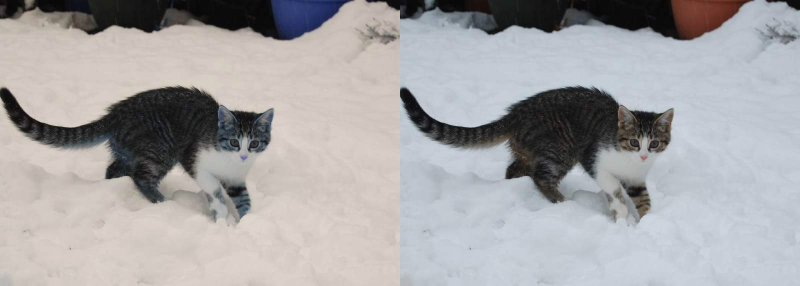

In [2]:
# step 2
urls = [
    "https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
    "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
    "https://placekitten.com/800/571",
    ]

for url in urls:
  image = io.imread(url)                            #read image
  image = cv.resize(image, (0, 0), fx=0.5, fy=0.5)  #resize image to half
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)    #convert color to RGB
  final_frame = cv.hconcat((image, image_2))        #concatenate image
  cv2_imshow(final_frame)                           #show image
  print('\n')

resolusi image: tinggi x lebar =  286 x 400


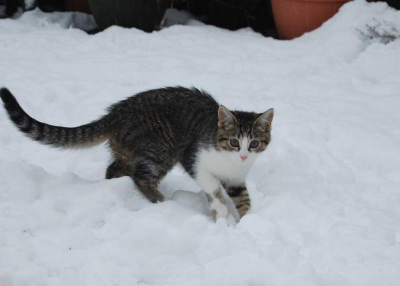

In [3]:
# step 3
tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("resolusi image: tinggi x lebar = ", tinggi, "x", lebar)
cv2_imshow(image_2)

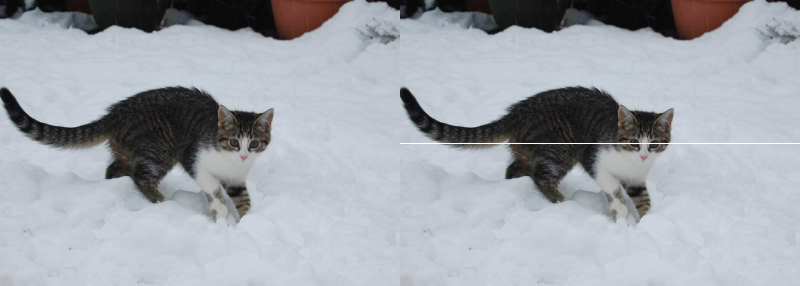

In [4]:
# step 4
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# membuat garis horizontal ditengah image
for y in range (lebar):
  image_3[int((tinggi)/2), y] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

**Pertanyaan**
#**Pertanyaan**


1.   Jelaskan, mengapa pada modul praktikum ini eksekusi kode Python dilakukan
menggunakan Google Colab?
**Jawab :** Karena dengan menggunakan Google Colab kita tidak perlu melakukan setup untuk python env beserta package-packagenya. Serta tidak akan membebankan device local karena proses operasi dijalankan pada komputer pada cloud.
2.   Jelaskan mengenai kegunaan setiap library pada praktikum langkah ke delapan?
Apakah semua library tersebut harus digunakan dalam praktikum sesi ini?
**Jawab :**  
*   NumPy meiliki kegunaan Operasi Matematika
*   Pandas memiliki kegunaan memproses data, pembersihan data, manipulasi data, hingga melakukan analisis data.
*   cv2 memiliki kegunaan pengolahan gambar, deteksi objek, pengolahan citra, visi komputer.
*   google.colab.patches memiliki kegunaan menampilkan gambar pada google colab
*  skimage memiliki kegunaan membaca dan menulis gambar
*  PIL meimiliki kegunaan manipulasi lanjutan
*  matplotlib.pylab memiliki kegunaan membuat visualisasi grafik

Tidak semua library pada langkah 8 digunakan pada praktikum ini

3.   Pada uji coba langkah ke-9 terdapat potongan kode program, Apa kegunaan kode program tersebut?dan apa pengaruhnya jika tidak dilakukan?
**Jawab :** untuk merubah ukuran gambar ke setengah ukuran gambar asli, dari ukuran asli berukuran 571 x 800 menjadi setengah dengan ukuran 286 x 400, apabila tidak dilakukan maka ukuran dari gambar asli tidak akan berubah.
4.   Apakah kegunaan kode [255,255,255] ? Jelaskan!
**Jawab :** Untuk menampilan warna pada garis horizontal, dengan urutan [B,G,R]
5.   Jelaskan keterkaitan antara pixel dan juga resolusi gambar yang tinggi ataupun rendah!
**Jawab :** Pixel adalah unit terkecil dalam gambar digital, sedangkan Resolusi merujuk pada jumlah total piksel dalam gambar. Jadi semakin tinggi resolusi gambar tersebut maka memiliki jumlah pixel yang lebih banyak, sedangkan resolusi gambar yang lebih rendah memiliki jumlah pixel yang lebih sedikit



**Tugas**

1.   Lakukan langkah-langkah praktikum seperti diatas
2.   Buat garis vertikal dan garis menyilang diagonal pada image keluaran
3.   Buat garis horisontal berwarna putih dibagian tengah gambar dengan panjang
tertentu
4.  Buat kotak menggunakan kumpulan pixel warna putih di sembarang tempat dalam
gambar

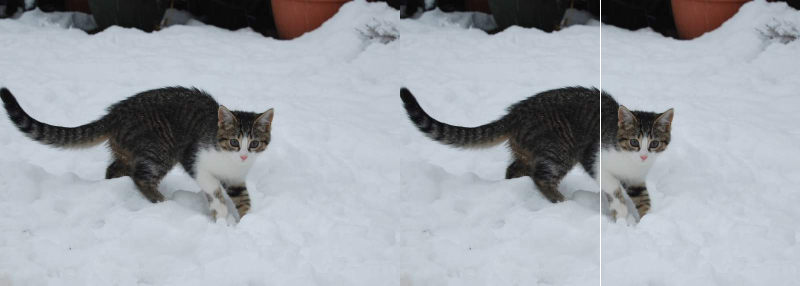

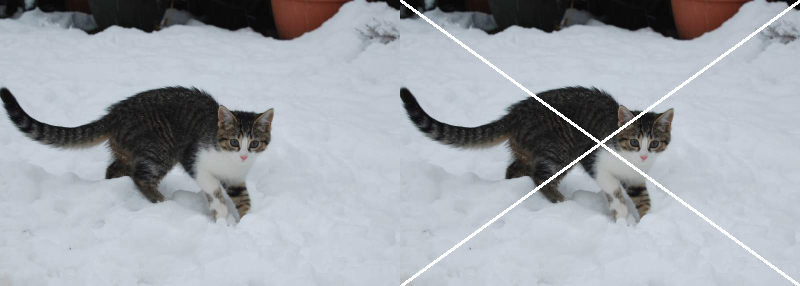

In [5]:
# JAWABAN TUGAS NO 2

# function for reset the image_2 and image_3
def reset_image():
  global image
  global image_2
  global image_3
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# membuat garis vertikal
reset_image()
for x in range(tinggi):
  image_3[x, int(lebar/2)] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

# membuat garis diagonal
reset_image()
cv.line(image_3, (0, 0), (lebar, tinggi), (255, 255, 255), 2)
cv.line(image_3, (lebar, 0), (0, tinggi), (255, 255, 255), 2)
final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

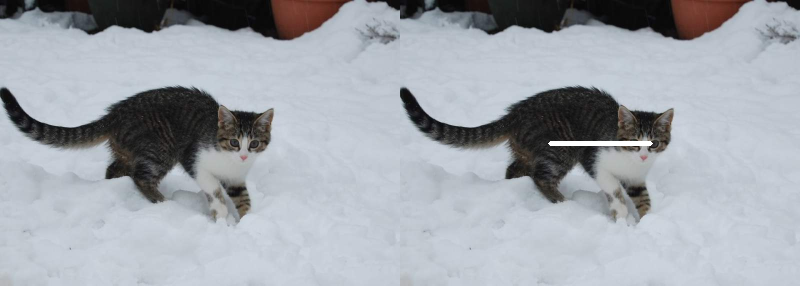

In [6]:
# JAWABAN TUGAS NO 3
reset_image()

# membuat garis horizontal dibagian tengah dengan panjang tertentu
line_lenght = 100
line_xstart = int(lebar/2) - int(line_lenght/2)
line_xend = line_xstart + line_lenght
line_y = int(tinggi/2)
cv.line(image_3, (line_xstart, line_y), (line_xend, line_y), (255, 255, 255), 3)
final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

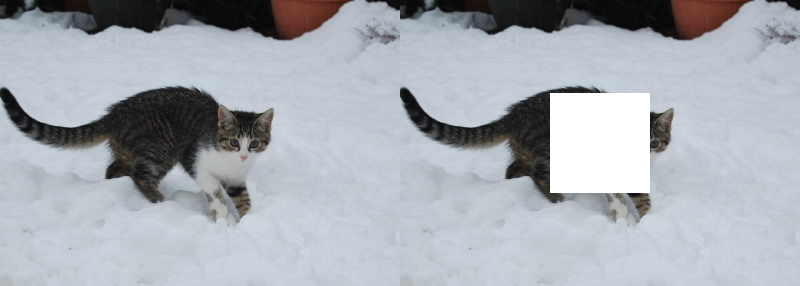

In [7]:
# JAWABAN TUGAS NO 4
reset_image()

# membuat kotak dibagian tengah
rec_size = 100
x_start = int((lebar/2) - (rec_size/2))
y_start = int((tinggi/2) - (rec_size/2))

for x in range(rec_size):
  for y in range(rec_size):
    image_3[y + y_start, x + x_start] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

**TUGAS KELOMPOK**
1. Akses file image lokal (KTP/SIM) dan tampilkan menggunakan OpenCV dan Matplotlib
2. Identifikasi kenapa menggunakan konversi warna BGR2RGB pada matplotlib dan tanpa
konversi pada opencv
3. Tutup tiap bagian tertentu dari kartu identitas tersebut. Kelompok 1 tutup bagian nomor
NIK dan nama. Kelompok 2 tutup bagian TTL dan Jenis Kelamin. Kelompok 3 tutup bagian
Gol. Darah dan TTD. Kelompok 4 tutup bagian Alamat dan Kecamatan. Kelompok 5 tutup
bagian Agama dan Status Kawin. Kelompok 6 tutup Pekerjaan dan kewarganegaraan.
Kelompok 7 tutup bagian berlaku hingga dan foto. Kelompok 8 tutup bagian kabupaten
dan tanggal dikeluarkan KTP yang ada dibagian bawah foto. Kelompok 9 tutup bagian
nama propinsi dan kabupaten di bagian paling atas KTP. Kelompok 10 tutup bagian RT/RW
dan Kel/desa. Tutup menggunakan 2 kotak warna yang berbeda. Tidak boleh
menggunakan fungsi rectangle openCV, fungsi ini akan dipelajari pada pertemuan 2.

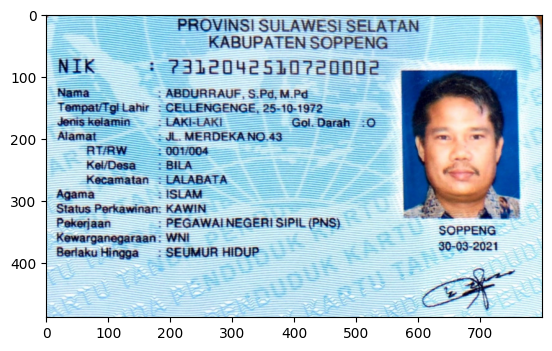

In [20]:
# Jawaban no 1

image_ktp = cv.imread('KTP.jpeg')
image_ktp_2 = cv.cvtColor(image_ktp, cv.COLOR_BGR2RGB)
plt.imshow(image_ktp_2)

**Jawaban no 2 :**  
Dilakukan conversi BGR2RGB dengan matplotlib adalah karena saat pertama di load format gambar yang digunakan oleh opencv adalah BGR bukan RGB yang merupakan standart format penampilan gambar pada kebanyakan layar

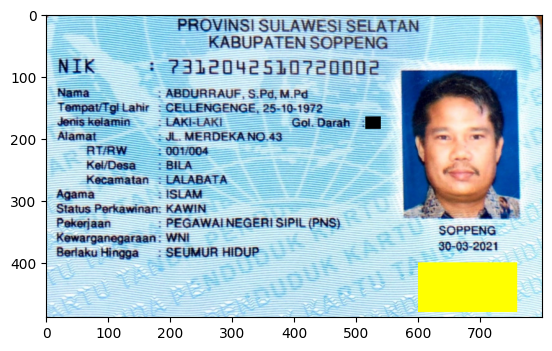

In [31]:
# Jawaban no 3
# Menutup gol darah dan TTD (Kel. 3)

# custom reuseable function to easily draw rectangle
def draw_rectangle(image, xstart, ystart, xlength, ylength, color):
    for x in range(xlength):
        for y in range(ylength):
            image[ystart + y, xstart + x] = color

image_ktp_3 = image_ktp_2.copy()
draw_rectangle(image_ktp_3, 515, 165, 25, 20, [0, 0, 0])
draw_rectangle(image_ktp_3, 600, 400, 160, 80, [255, 255, 0])
plt.imshow(image_ktp_3)
plt.show()